We want to compare the state spaces of both the tasks once the PPO algorithm has converged.

In [13]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [16]:
env = gym.make('HalfCheetah-v4')

In [17]:
model = PPO('MlpPolicy', env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model.learn(total_timesteps=1_000_000, progress_bar=True)

In [5]:
model.save("ppo_half_cheetah")

In [8]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

print(f"Mean reward: {mean_reward}, Std reward: {std_reward}")

Mean reward: 1682.8620305533782, Std reward: 116.00409815475679


In [2]:
env2 = gym.make('HalfCheetah-v3', xml_file="./modified_gym_envs/assets/modifiedHalfCheetah.xml")

/home/saimadhavang/miniconda3/envs/tiai/lib/python3.12/site-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment HalfCheetah-v3 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(
/home/saimadhavang/miniconda3/envs/tiai/lib/python3.12/site-packages/gymnasium/envs/mujoco/mujoco_env.py:211: DeprecationWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.deprecation(


In [3]:
model2 = PPO('MlpPolicy', env2, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model.learn(total_timesteps=1_000_000, progress_bar=True)

In [10]:
model2.save("ppo_half_cheetah_2")

In [ ]:
model2 = PPO.load("ppo_half_cheetah_2")
state_values2 = []

obs, _ = env2.reset()
n_steps = 10000
for step in tqdm(range(n_steps)):
    # Use the model to predict the next action
    action, _states = model2.predict(obs)
    
    # Take the action in the environment
    obs, rewards, dones, truncated, info = env2.step(action)
    
    # Store the current state (observation) values
    state_values2.append(obs)

    # If the episode is done, reset the environment
    if dones or truncated:
        obs, _ = env2.reset()
state_values2 = np.array(state_values2)
np.save('state_values_2.npy', state_values2)

In [18]:
model = PPO.load("ppo_half_cheetah")
state_values = []

obs, _ = env.reset()
n_steps = 10000
for step in tqdm(range(n_steps)):
    # Use the model to predict the next action
    action, _states = model.predict(obs)
    
    # Take the action in the environment
    obs, rewards, dones, truncated, info = env.step(action)
    
    # Store the current state (observation) values
    state_values.append(obs)

    # If the episode is done, reset the environment
    if dones or truncated:
        obs, _ = env.reset()
state_values = np.array(state_values)
np.save('state_values.npy', state_values)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [20]:
np.save('state_values.npy', state_values)
np.save('state_values_2.npy', state_values2)

In [25]:
num_dimensions

17

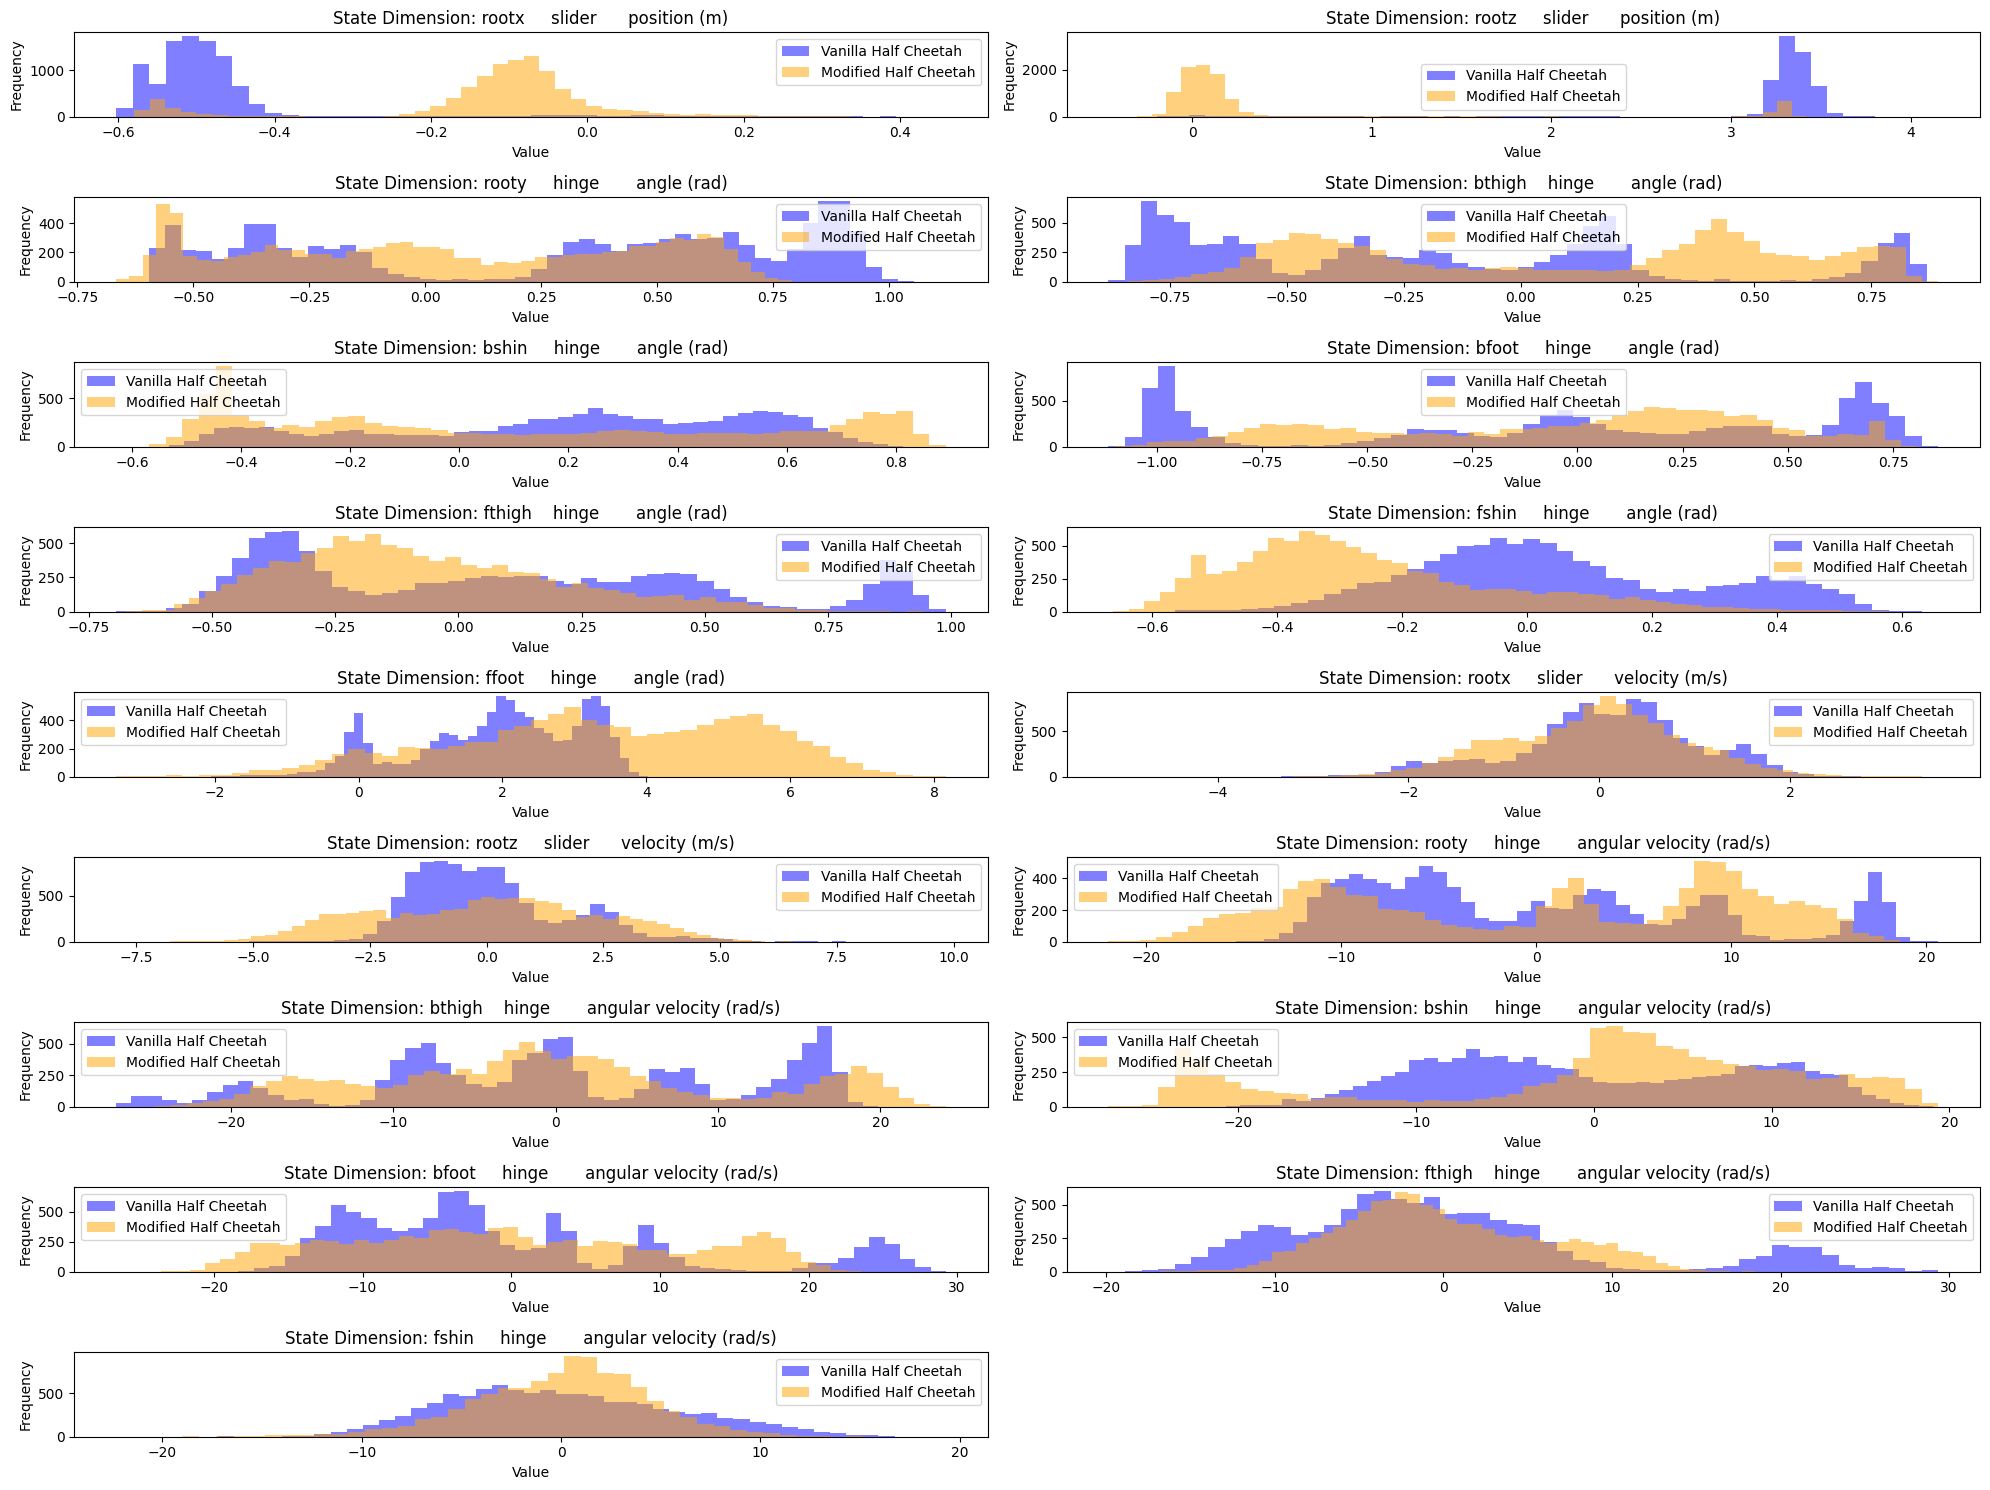

In [29]:
num_dimensions = state_values2.shape[1]


state_titles = [
    'rootx     slider      position (m)',
    'rootz     slider      position (m)',
    'rooty     hinge       angle (rad)',
    'bthigh    hinge       angle (rad)',
    'bshin     hinge       angle (rad)',
    'bfoot     hinge       angle (rad)',
    'fthigh    hinge       angle (rad)',
    'fshin     hinge       angle (rad)',
    'ffoot     hinge       angle (rad)',
    'rootx     slider      velocity (m/s)',
    'rootz     slider      velocity (m/s)',
    'rooty     hinge       angular velocity (rad/s)',
    'bthigh    hinge       angular velocity (rad/s)',
    'bshin     hinge       angular velocity (rad/s)',
    'bfoot     hinge       angular velocity (rad/s)',
    'fthigh    hinge       angular velocity (rad/s)',
    'fshin     hinge       angular velocity (rad/s)',
    'ffoot     hinge       angular velocity (rad/s)'
]
# Plot the comparison histograms
plt.figure(figsize=(20, 15))
for i in range(num_dimensions):
    plt.subplot((num_dimensions // 2)+1, 2, i + 1)  # Subplots for each dimension
    
    # Plot the histogram for the earlier model
    plt.hist(state_values[:, i], bins=50, alpha=0.5, label='Vanilla Half Cheetah', color='blue')
    
    # Plot the histogram for the current model
    plt.hist(state_values2[:, i], bins=50, alpha=0.5, label='Modified Half Cheetah', color='orange')
    
    plt.title(f"State Dimension: {state_titles[i]}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    
    # Add legend to distinguish between the two models
    plt.legend()

plt.tight_layout()
plt.show()

In [30]:
plt.savefig('state_space_comparison.png')

<Figure size 640x480 with 0 Axes>